# Multi-class classification

## Load dataset

In [92]:
import seaborn as sns

In [9]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [10]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.target.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: target, dtype: int64

## Setting up train/test data

In [67]:
X = np.array(df[['sepal length', 'sepal width', 'petal length', 'petal width']])
y = np.array(df['target'])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

Given : $\pi = 3.14$ , $\alpha = \frac{3\pi}{4}\, rad$
$$
\omega = 2\pi f \\
f = \frac{c}{\lambda}\\
\lambda_0=\theta^2+\delta\\
\Delta\lambda = \frac{1}{\lambda^2}
$$

## Logistic regression
> Logistic function: $h_{\theta}(x) = g(\theta^T x) = \frac{1}{1+e^{-\theta^T x}}$, denotes the predicted probability for label y=1 for input x.  
> Cost function: $min_{\theta} Logloss = min_{\theta} - \sum_{i=1}^N \big\{y_i\log h_\theta(x_i) + (1-y_i)\log (1-h_\theta(x_i))\big\}$ is convex in $x$ (MLE).  
> Multiclass with k classes: Perform k times one class versus other classes logistic regression. Output predicted probability for each class and select the maximum one.  
> Regularization: add $\lambda \|\theta\|_2$ term in the Logloss function (without penalizing intercept term $\theta_0$).   
> Larger $\lambda$, more regularization, less variance but more bias

In [69]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [88]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [71]:
clf = LogisticRegression(random_state=0).fit(X_train,y_train)

In [80]:
clf.predict(X_test[:2,:]), y_test[:2]

(array(['Iris-virginica', 'Iris-versicolor'], dtype=object),
 array(['Iris-virginica', 'Iris-versicolor'], dtype=object))

In [77]:
clf.predict_proba(X_test[:2,:])

array([[1.16478077e-04, 5.59628393e-02, 9.43920683e-01],
       [1.26376707e-02, 9.60278185e-01, 2.70841441e-02]])

In [84]:
# Mean accuracy
print("training accuracy:", clf.score(X_train,y_train))
print("testing accuracy:", clf.score(X_test,y_test))

training accuracy: 0.9821428571428571
testing accuracy: 0.9736842105263158


In [85]:
confusion_matrix(y_test, clf.predict(X_test))

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

## SVM
> $w^T x$ is the projection of vector $x$ onto $w$ and scale it by $\|w\|_2$.  
> Ideally, if all points are separable, we have $y_i(w^Tx_i+b) \geq 1$ for all $i=1, 2, ..., N$. The width of the band is $\frac{2}{\|w\|_2^2}$.  
> The support vector machine (SVM) tries to find a direction so that the margin is maximized, this is equivalent to 
\begin{align}
\min_{w,b}\  & \frac{1}{2} w^Tw \\
s.t.\  & y_i(w^Tx_i + b) \geq 1, i=1,2, ..., N
\end{align}
> However, if we allow some samples to be at a distance $\zeta_i\geq 0$ from their correct margin boundary, and apply some feature engineering on our inputs $x_i$, we are essentially solving  
\begin{align}
\min_{w,b,\zeta}\  & \frac{1}{2} w^Tw + C \sum_{i=1}^N \zeta_i \\
s.t.\  & y_i(w^T \phi(x_i) + b) \geq 1-\zeta_i, i=1,2, ..., N \\
& \zeta_i \geq 0, i=1,2, ..., N
\end{align}
where $C$ is an inverse regularization parameter. Larger $C$ means more penalty for bias, hence less regularization and less bias, more variance.  
> For more classes, similar to logistic regression, we can train K separate SVM model based on one class versus all other classes.

**Solving SVM:**
> The dual problem of the above problem is 
\begin{align}
\max_\alpha \ & \frac{1}{2} \alpha^T Q \alpha - e^T \alpha  \\
s.t. \ &y^T \alpha = 0  \\
& 0 \leq \alpha \leq C
\end{align}
where $Q = (Q_{ij})$, $Q_{ij} = y_i y_j K(x_i, x_j)$, $K(x_i, x_j) = \phi(x_i)^T\phi(x_j)$ is the kernel.  

> Typical kernals to use:
> * Linear: $K(x,x') = x^Tx'$
> * Polynomial: $K(x,x') = (\gamma x^Tx' + coef0)^d$
> * rbf: $K(x,x') = \exp(-\gamma\|x-x'\|^2)$
> * sigmoid: $K(x,x') = \tanh(\gamma x^Tx' + coef0)$

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

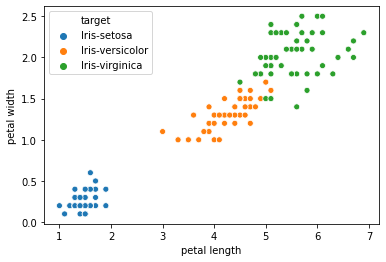

In [97]:
sns.scatterplot(x='petal length',y='petal width', hue = 'target', data = df)

In [56]:
print(len(X_train), len(X_test))

112 38


In [169]:
a = SVC(kernel = 'poly', C = 1)

In [170]:
a?

Type:        SVC
String form: SVC(C=1, kernel='poly')
File:        ~/learn/playground/env/lib/python3.7/site-packages/sklearn/svm/_classes.py
Docstring:  
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`sklearn.svm.LinearSVC` or
:class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
C : float, default=1.0
    Regularization parameter. The strength of 

In [125]:
# Using two features only
i = (df['target'] != 'Iris-setosa')
X = np.array(df.loc[i][['petal length', 'petal width']])
y = np.array(df.loc[i]['target'])
w={}
b={}
for C in [0.1,1,10]:
    svm_model_linear = SVC(kernel = 'linear', C = C).fit(X, y) 
    w[C] = svm_model_linear.coef_
    b[C] = svm_model_linear.intercept_
    print(w[C], b[C])

[[1.19016375 0.95213016]] [-7.4265328]
[[2.1829247  2.25365588]] [-14.41486828]
[[2.75873306 4.82861713]] [-21.20914737]


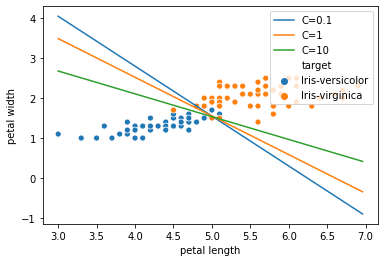

In [135]:
ax = sns.scatterplot(x='petal length',y='petal width', hue = 'target', data = df.loc[i])
xnum = np.array([3+t*4/100.0 for t in range(100)])
for C in [0.1,1,10]:
    ax.plot(xnum, xnum*(-w[C][0][0]/w[C][0][1])-b[C][0]/w[C][0][1], label='C={}'.format(C))
ax.legend()
#ax.legend([0.1,1,10])

In [136]:
# Full model
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 

In [137]:
svm_model_linear.coef_

array([[-0.04627259,  0.52114901, -1.00303714, -0.46412669],
       [ 0.04016065,  0.16064259, -0.56224908, -0.24096389],
       [ 0.84531147,  0.72837956, -2.09462768, -1.83669367]])

In [138]:
svm_predictions = svm_model_linear.predict(X_test) 
svm_predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [139]:
accuracy = svm_model_linear.score(X_test, y_test) 

In [140]:
accuracy

0.9736842105263158

In [141]:
cm = confusion_matrix(y_test, svm_predictions) 

In [142]:
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [ ]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [143]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 

In [155]:
knn.predict_proba(X_test[8:12,:])

array([[0.        , 0.85714286, 0.14285714],
       [0.        , 1.        , 0.        ],
       [0.        , 0.14285714, 0.85714286],
       [0.        , 1.        , 0.        ]])

In [156]:
knn.predict(X_test[8:12,:])

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [158]:
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
accuracy = knn.score(X_test, y_test) 

In [159]:
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [160]:
accuracy

0.9736842105263158